In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns', 20)

In [ ]:
df = pd.read_stata('gss2020panel_r1a.dta', convert_categoricals = False)

<ipython-input-3-fff974a1a13e>:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('gss2020panel_r1a.dta', convert_categoricals = False)


In [ ]:
df.head()

,samptype,yearid,fileversion,panstat,wtssall_1a,wtssall_1b,wtssall_2,wtssnr_1a,wtssnr_1b,wtssnr_2,...,sprtlrgr_2,sprtpurp_2,poltrtblk_2,poltrthsp_2,defund_2,strvbias_2,wrycovid_2,wrypaybills_2,wrygetsick_2,anesid
0,2016,20160001,GSS 2020 Panel Release 1 (May 2021),1,0.956994,NaN,1.085009,1.260478,NaN,1.443929,...,7.0,7.0,2.0,4.0,2.0,2.0,3.0,4.0,3.0,169657.0
1,2016,20160002,GSS 2020 Panel Release 1 (May 2021),1,0.478497,NaN,0.542504,0.630239,NaN,0.721964,...,7.0,7.0,4.0,4.0,1.0,2.0,4.0,4.0,3.0,169664.0
2,2016,20160003,GSS 2020 Panel Release 1 (May 2021),0,0.956994,NaN,NaN,1.260478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,20160004,GSS 2020 Panel Release 1 (May 2021),1,1.913987,NaN,2.170018,2.520956,NaN,2.887858,...,5.0,4.0,4.0,4.0,2.0,1.0,3.0,4.0,4.0,NaN
4,2016,20160005,GSS 2020 Panel Release 1 (May 2021),0,1.435490,NaN,NaN,1.890717,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(list(df.columns))

['samptype', 'yearid', 'fileversion', 'panstat', 'wtssall_1a', 'wtssall_1b', 'wtssall_2', 'wtssnr_1a', 'wtssnr_1b', 'wtssnr_2', 'vstrat_1a', 'vstrat_1b', 'vstrat_2', 'vpsu_1a', 'vpsu_1b', 'vpsu_2', 'year_1a', 'year_1b', 'year_2', 'id_1a', 'id_1b', 'id_2', 'mar1_1a', 'mar2_1a', 'mar3_1a', 'mar4_1a', 'mar5_1a', 'mar6_1a', 'mar7_1a', 'mar8_1a', 'mar9_1a', 'mar10_1a', 'mar11_1a', 'mar12_1a', 'mar13_1a', 'mar14_1a', 'abany_1a', 'abdefect_1a', 'abhlth_1a', 'abnomore_1a', 'abpoor_1a', 'abrape_1a', 'absingle_1a', 'acqntsex_1a', 'adforjob_1a', 'adults_1a', 'advfront_1a', 'advsched_1a', 'affrmact_1a', 'age_1a', 'aged_1a', 'agedchld_1a', 'agedpar_1a', 'agekdbrn_1a', 'aidcol_1a', 'aidhouse_1a', 'aidindus_1a', 'aidold_1a', 'aidunemp_1a', 'appemps_1a', 'artatt_1a', 'artatt1_1a', 'artatt2_1a', 'artatt3_1a', 'artatt4_1a', 'artatt5_1a', 'artcost_1a', 'artexbt_1a', 'artfree_1a', 'artgst_1a', 'artint_1a', 'artloc_1a', 'artmostoth_1a', 'artothr_1a', 'arttime_1a', 'arttrvl_1a', 'artwhy1_1a', 'artwhy2_1a', 

In [ ]:
print(df['charactr_1b'].unique())

[nan  2.  4.  3.  1.]


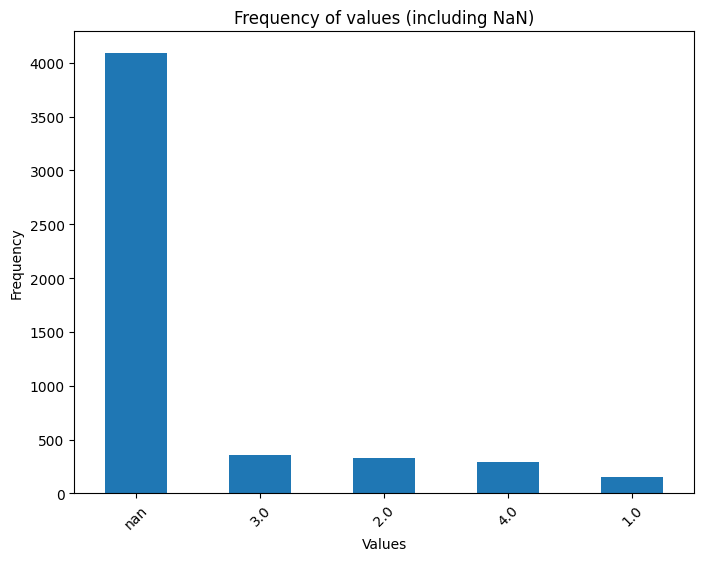

In [ ]:
# Calculate value counts, including NaN values
import matplotlib.pyplot as plt
value_counts = df['charactr_1b'].value_counts(dropna=False)

# Plot frequency graph
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of values (including NaN)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def plot_freq(column_name):
    value_counts = df[column_name].value_counts(dropna=False)

    # Plot frequency graph
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Frequency of values (including NaN)')
    plt.xticks(rotation=90)


In [ ]:
# Calculate percentage of NaN values in each column
nan_percentage = df.isnull().mean() * 100

# Filter columns where the percentage of NaN values is less than 20%
selected_columns = nan_percentage[nan_percentage < 20].index

In [ ]:
print(len(selected_columns))

4


In [ ]:
print(selected_columns)

Index(['samptype', 'yearid', 'fileversion', 'panstat'], dtype='object')


In [ ]:
# Calculate percentage of NaN values in each column
nan_percentage = df.isnull().mean() * 100

# Filter columns where the percentage of NaN values is less than 20%
selected_columns = nan_percentage[nan_percentage < 50].index

In [ ]:
print(len(selected_columns))

153


In [ ]:
print(list(selected_columns))

['samptype', 'yearid', 'fileversion', 'panstat', 'wtssall_1a', 'wtssnr_1a', 'vstrat_1a', 'vpsu_1a', 'year_1a', 'id_1a', 'mar1_1a', 'adults_1a', 'age_1a', 'attend_1a', 'babies_1a', 'ballot_1a', 'bible_1a', 'born_1a', 'cappun_1a', 'childs_1a', 'class_1a', 'cohort_1a', 'comprend_1a', 'consent_1a', 'coop_1a', 'dateintv_1a', 'degree_1a', 'dwelling_1a', 'earnrs_1a', 'educ_1a', 'eth2_1a', 'eth3_1a', 'ethnic_1a', 'ethnum_1a', 'famgen_1a', 'family16_1a', 'feeused_1a', 'finalter_1a', 'finrela_1a', 'form_1a', 'formwt_1a', 'fund_1a', 'fund16_1a', 'gender1_1a', 'god_1a', 'granborn_1a', 'happy_1a', 'hefinfo_1a', 'hhrace_1a', 'hhtype_1a', 'hhtype1_1a', 'hispanic_1a', 'hompop_1a', 'huclean_1a', 'incom16_1a', 'indus10_1a', 'intage_1a', 'intethn_1a', 'inthisp_1a', 'intid_1a', 'intrace1_1a', 'intsex_1a', 'intyrs_1a', 'isco08_1a', 'isco88_1a', 'issp_1a', 'lngthinv_1a', 'madeg_1a', 'marcohab_1a', 'marital_1a', 'mawrkgrw_1a', 'mobile16_1a', 'mode_1a', 'natchld_1a', 'natenrgy_1a', 'natmass_1a', 'natpark_1a',

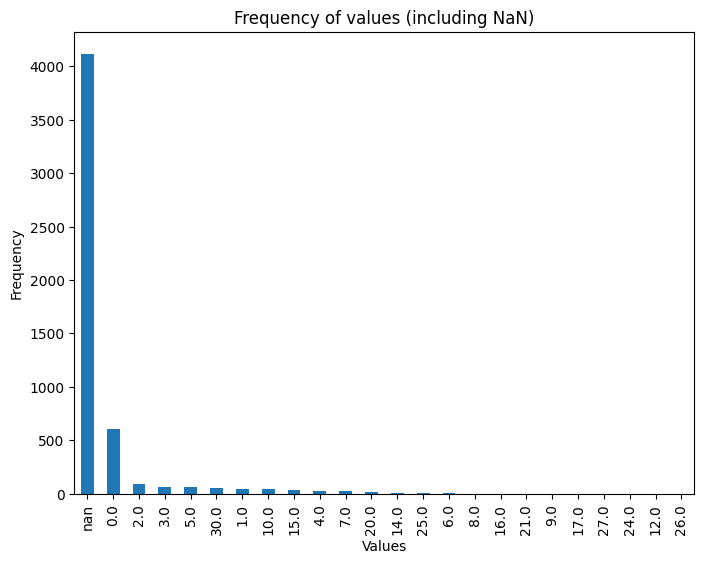

In [ ]:
plot_freq("mntlhlth_1a")

plt.show()

## Analysis Begins

## Selecting variables

Outcome variables = "mntlhlth" ; “hlthmntl”

Confounding variables = Confounding variables are those that can affect both marital status and mental health (e.g., wealth). In our case, the whole point of causal machine learning is to account for the confounding variables in our model0

Treatment variable =


Other preprocessing tasks include (1) checking missing values, (2) turning the levels in categorical variables to one-hot encoding.

Instead of just predicting the target variable, we need to find the variables that cause the outcome. We also need to be able to estimate how that outcome would change, if we changed these variables. This is causal inference.

A practical definition of causality is the following. We say that a treatment T (can also be a decision or an action) causes an outcome Y if and only if changing T leads to a change of Y while everything else is kept constant.

Let's say in the past, we took action and set T to 1 and we have an outcome Y(T=1). Now, imagine a world, where T was not changed (T is set to 0) while everything else was kept constant. We call this world a counterfactual. If Y(T=0) would have been different from Y(T=1), the causal effect is the magnitude by which the outcome Y changes: i.e. Y(T=1)-Y(T=0). These are the practical definitions of causality and causal effect.

Outcome Variable: Also known as the dependent variable, the outcome variable is the variable that researchers are interested in understanding or predicting. It's the variable that is measured or observed to determine the effect of the treatment or intervention. For example, in a study examining the effectiveness of a new drug on reducing blood pressure, the outcome variable would be the blood pressure readings of the participants.

Confounding Variables: These are variables other than the treatment variable that can influence the outcome variable and thus lead to incorrect conclusions if not properly accounted for. Confounding variables can distort the relationship between the treatment and outcome variables, making it difficult to determine whether any observed effects are truly due to the treatment or are influenced by other factors. For instance, in a study investigating the relationship between coffee consumption and heart health, age could be a confounding variable because older individuals may be more likely to drink coffee and also more likely to have heart problems.

Treatment Variables: Also known as independent variables, treatment variables are the variables that researchers manipulate or control in an experiment. These are the variables that are hypothesized to cause a change in the outcome variable. In a medical study, for example, the treatment variable might be the administration of a particular medication, while in a psychological study, it might be the use of a specific therapy technique.

Back to our example,
 is the academic performance for student i if he or she is in a classroom with tablets. Whether this is or not the case, it doesn’t matter for
. It is the same regardless. If student i gets the tablet, we can observe
. If not, we can observe
. Notice how in this last case,
 is still defined, we just can’t see it. In this case, it is a counterfactual potential outcome.




In [ ]:
print(list(df.columns))

['samptype', 'yearid', 'fileversion', 'panstat', 'wtssall_1a', 'wtssall_1b', 'wtssall_2', 'wtssnr_1a', 'wtssnr_1b', 'wtssnr_2', 'vstrat_1a', 'vstrat_1b', 'vstrat_2', 'vpsu_1a', 'vpsu_1b', 'vpsu_2', 'year_1a', 'year_1b', 'year_2', 'id_1a', 'id_1b', 'id_2', 'mar1_1a', 'mar2_1a', 'mar3_1a', 'mar4_1a', 'mar5_1a', 'mar6_1a', 'mar7_1a', 'mar8_1a', 'mar9_1a', 'mar10_1a', 'mar11_1a', 'mar12_1a', 'mar13_1a', 'mar14_1a', 'abany_1a', 'abdefect_1a', 'abhlth_1a', 'abnomore_1a', 'abpoor_1a', 'abrape_1a', 'absingle_1a', 'acqntsex_1a', 'adforjob_1a', 'adults_1a', 'advfront_1a', 'advsched_1a', 'affrmact_1a', 'age_1a', 'aged_1a', 'agedchld_1a', 'agedpar_1a', 'agekdbrn_1a', 'aidcol_1a', 'aidhouse_1a', 'aidindus_1a', 'aidold_1a', 'aidunemp_1a', 'appemps_1a', 'artatt_1a', 'artatt1_1a', 'artatt2_1a', 'artatt3_1a', 'artatt4_1a', 'artatt5_1a', 'artcost_1a', 'artexbt_1a', 'artfree_1a', 'artgst_1a', 'artint_1a', 'artloc_1a', 'artmostoth_1a', 'artothr_1a', 'arttime_1a', 'arttrvl_1a', 'artwhy1_1a', 'artwhy2_1a', 

## The confounding variables chosen in preprocessing step

- 'adults_1a', : household members 18 yrs and older V1
- 'attend_1a', : how often respondent attend religious service V2
- 'degree_1a', : R’s highest degree V3
- 'earnrs_1a', ': how many in family earned money V4
- 'hhrace_1a', : race of household V5
- 'satfin_1a' : SATISFACTION WITH FINANCIAL SITUATION  V6
- 'wrkstat_1a' : LABOR FORCE STATUS V7
- 'neisafe_1a' : HOW SAFE INTERVIEWER THINKS NEIGHBORHOOD IS V8
- 'relpersn_1a' : R CONSIDER SELF A RELIGIOUS PERSON V9

Treatment Variables
1. 'Mar1_1a',: marital status of 1st person
2. 'Marital_1a',: marital status

Outcome Variables
1. "mntlhlth" : Days of poor mental health in past 30 days
2. “hlthmntl” : How one rates their mental health including mood and ability to think.

## Considering 2016 cohort (confounder, treatment and outcome)
### First considering outcome = mntlhlth_1a

In [ ]:
selected_cols = ['samptype', 'yearid', 'adults_1a', 'attend_1a','degree_1a', 'earnrs_1a', 'hhrace_1a',
                 'satfin_1a', 'wrkstat_1a', 'neisafe_1a', 'relpersn_1a', 'mar1_1a',
                 'marital_1a', 'mntlhlth_1a']

df_prep = df[selected_cols].copy(deep=True)
df_prep.head()

,samptype,yearid,adults_1a,attend_1a,degree_1a,earnrs_1a,hhrace_1a,satfin_1a,wrkstat_1a,neisafe_1a,relpersn_1a,mar1_1a,marital_1a,mntlhlth_1a
0,2016,20160001,2.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,NaN
1,2016,20160002,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,4.0,5.0,3.0
2,2016,20160003,2.0,7.0,3.0,0.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,0.0
3,2016,20160004,4.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,NaN
4,2016,20160005,3.0,0.0,4.0,4.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,NaN


In [ ]:
df_prep.tail()

,samptype,yearid,adults_1a,attend_1a,degree_1a,earnrs_1a,hhrace_1a,satfin_1a,wrkstat_1a,neisafe_1a,relpersn_1a,mar1_1a,marital_1a,mntlhlth_1a
5210,2018,20182344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5211,2018,20182345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5212,2018,20182346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,2018,20182347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5214,2018,20182348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_prep = df_prep[df_prep['samptype']==2016].copy(deep=True)

In [ ]:
df_prep.tail()

,samptype,yearid,adults_1a,attend_1a,degree_1a,earnrs_1a,hhrace_1a,satfin_1a,wrkstat_1a,neisafe_1a,relpersn_1a,mar1_1a,marital_1a,mntlhlth_1a
2862,2016,20162863,2.0,3.0,4.0,2.0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0
2863,2016,20162864,1.0,7.0,1.0,0.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,NaN
2864,2016,20162865,2.0,7.0,1.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,1.0,NaN
2865,2016,20162866,2.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN
2866,2016,20162867,2.0,0.0,3.0,1.0,1.0,2.0,5.0,1.0,4.0,1.0,1.0,0.0


In [ ]:
df_prep.dropna(inplace=True)
df_prep.shape

(1036, 14)

In [ ]:
df_prep.head()

,samptype,yearid,adults_1a,attend_1a,degree_1a,earnrs_1a,hhrace_1a,satfin_1a,wrkstat_1a,neisafe_1a,relpersn_1a,mar1_1a,marital_1a,mntlhlth_1a
1,2016,20160002,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,4.0,5.0,3.0
2,2016,20160003,2.0,7.0,3.0,0.0,1.0,2.0,5.0,1.0,1.0,1.0,1.0,0.0
5,2016,20160006,2.0,0.0,2.0,1.0,1.0,2.0,7.0,1.0,4.0,1.0,1.0,2.0
7,2016,20160008,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,3.0,1.0,1.0,1.0
12,2016,20160013,4.0,5.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,1.0,0.0


## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# the independent variables set
X = df_prep[['adults_1a', 'attend_1a','degree_1a', 'earnrs_1a', 'hhrace_1a',
         'satfin_1a', 'wrkstat_1a', 'neisafe_1a', 'relpersn_1a']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

       feature       VIF
0    adults_1a  7.953310
1    attend_1a  2.983462
2    degree_1a  2.875657
3    earnrs_1a  4.828863
4    hhrace_1a  2.843698
5    satfin_1a  7.588093
6   wrkstat_1a  3.219783
7   neisafe_1a  5.875242
8  relpersn_1a  7.508790


Although adults_1a and relpersn_1a are somewhat correlated, based on a benchmark of VIF = 10, we don't have highly correlated variables and thus we don't need to eliminate any variables.

In [ ]:
# for i in selected_cols:
#     print(df_prep[i].unique())

### Convert treatment variable to binary 0 or 1

In [ ]:
# print(df_prep['mar1_1a'].unique())
# print(df_prep['marital_1a'].unique())

# print("\n After \n")
# df_prep['mar1_1a'] = df['mar1_1a'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})
# df_prep['marital_1a'] = df['marital_1a'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})


# print(df_prep['mar1_1a'].unique())
# print(df_prep['marital_1a'].unique())


[4. 1. 3. 5. 2.]
[5. 1. 3. 2. 4.]

 After 

[1. 0.]
[1. 0.]


In [ ]:
df_prep["marital_1a"].value_counts()

marital_1a
1.0    454
5.0    288
3.0    186
2.0     76
4.0     32
Name: count, dtype: int64

In [ ]:
# only keep married (marital == 1) and never married (marital == 5)
df_prep.loc[df_prep['marital_1a'].isin([1,5])].shape
df_prep.shape

(1036, 14)

In [ ]:
# rename columns to remove suffix
col_dict = {x: x.split('_')[0] for x in list(df_prep.columns)}
df_prep.rename(columns=col_dict, inplace=True)
df_prep['marital'] = df_prep['marital'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df_prep['hhrace'].value_counts()

hhrace
1.0    786
2.0    153
5.0     74
4.0     16
3.0      7
Name: count, dtype: int64

In [ ]:
# one-hot encoding race variable
df_prep['race_is_white'] = df_prep['hhrace'].isin([1])
df_prep['race_is_black'] = df_prep['hhrace'].isin([2])
df_prep['race_is_other'] = df_prep['hhrace'].isin([3])
df_prep.drop(columns=['hhrace'], inplace=True)
df_prep.head()

,samptype,yearid,adults,attend,degree,earnrs,satfin,wrkstat,neisafe,relpersn,mar1,marital,mntlhlth,race_is_white,race_is_black,race_is_other
1,2016,20160002,1.0,0.0,1.0,1.0,3.0,1.0,1.0,4.0,4.0,0,3.0,True,False,False
2,2016,20160003,2.0,7.0,3.0,0.0,2.0,5.0,1.0,1.0,1.0,1,0.0,True,False,False
5,2016,20160006,2.0,0.0,2.0,1.0,2.0,7.0,1.0,4.0,1.0,1,2.0,True,False,False
7,2016,20160008,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,1,1.0,False,False,False
12,2016,20160013,4.0,5.0,1.0,4.0,3.0,2.0,2.0,2.0,1.0,1,0.0,False,True,False


# Propensity Score and Outcome Model

In [ ]:
# train test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = df_prep.drop(columns=['mntlhlth', 'marital', 'samptype', 'yearid', 'adults', 'attend', 'earnrs', 'wrkstat'])
y = df_prep['marital']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# random search the hyperparameter space
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier(random_state=99)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


In [ ]:
# grid search near the hyperparameters obtained through random search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [50,70,90],
    'max_features': ['log2'],
    'min_samples_leaf': [2,4,6],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [200,400,600]
}
rf = RandomForestClassifier(random_state=99)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=400; total

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'bootstrap': [True], 'max_depth': [50, 70, 90],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [200, 400, 600]},
             verbose=2)

In [ ]:
# print best parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [ ]:
print('Test set score:', best_rf.score(X_test, y_test))
print('Train set score:', best_rf.score(X_train, y_train))

Test set score: 0.9615384615384616
Train set score: 0.9371980676328503


In [ ]:
df_prep.head()

,samptype,yearid,adults,attend,degree,earnrs,satfin,wrkstat,neisafe,relpersn,mar1,marital,mntlhlth,race_is_white,race_is_black,race_is_other
1,2016,20160002,1.0,0.0,1.0,1.0,3.0,1.0,1.0,4.0,4.0,0,3.0,True,False,False
2,2016,20160003,2.0,7.0,3.0,0.0,2.0,5.0,1.0,1.0,1.0,1,0.0,True,False,False
5,2016,20160006,2.0,0.0,2.0,1.0,2.0,7.0,1.0,4.0,1.0,1,2.0,True,False,False
7,2016,20160008,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,1,1.0,False,False,False
12,2016,20160013,4.0,5.0,1.0,4.0,3.0,2.0,2.0,2.0,1.0,1,0.0,False,True,False


In [ ]:
#DEEPANSHU
# plt.hist(df_prep["propensity"], bins=20, alpha=0.3, label="All")
plt.hist(df_prep.query("marital==0")["propensity"], bins=20, alpha=0.3, color="C2", label='Never Married')
plt.hist(df_prep.query("marital==1")["propensity"], bins=20, alpha=0.3, color="C3", label=' Married')
plt.legend()

KeyError: 'propensity'

In [ ]:
df_prep.to_csv(path_or_buf='data_2016_outcome.csv', index=False)

OUTCOME MODEL

In [ ]:
# read in the data
data = pd.read_csv('data_2016_outcome.csv')

In [ ]:
data = data.drop(columns=['mar1','samptype', 'yearid', 'adults', 'attend', 'earnrs', 'wrkstat'])

In [ ]:
data.head()

,degree,satfin,neisafe,relpersn,marital,mntlhlth,race_is_white,race_is_black,race_is_other
0,1.0,3.0,1.0,4.0,0,3.0,True,False,False
1,3.0,2.0,1.0,1.0,1,0.0,True,False,False
2,2.0,2.0,1.0,4.0,1,2.0,True,False,False
3,1.0,2.0,2.0,3.0,1,1.0,False,False,False
4,1.0,3.0,2.0,2.0,1,0.0,False,True,False


In [ ]:
from sklearn.ensemble import RandomForestClassifier
best_rf = RandomForestClassifier(bootstrap=True, max_depth=50, max_features='log2',
                                 n_estimators=200,
                                 min_samples_leaf=4,
                                 min_samples_split=8,
                                 random_state=99)

In [ ]:
best_rf.fit(data.drop(columns=['mntlhlth', 'marital']), y=data['marital'])

RandomForestClassifier(max_depth=50, max_features='log2', min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200, random_state=99)

In [ ]:
data['propensity'] = best_rf.predict_proba(data.drop(columns=['mntlhlth', 'marital']))[:,1]
data.shape

(1036, 11)

In [ ]:
# remove propensity score that is 1 or zero
data = data.loc[~data['propensity'].isin([1,0])]
data.shape

(1027, 11)

In [ ]:
def ipw_cal(propensity_score, marital_status):
    '''
    Calculates IPW score for given propensity score and marital status
    :param propensity_score: propensity score
    :param marital_status: marital status
    :return: get the inverse propensity score weights
    '''
    if marital_status == 1:
        weighting = 1/propensity_score

    if marital_status == 0:
        weighting = 1/(1-propensity_score)

    return weighting

In [ ]:
data['weighting'] = [ipw_cal(x, y) for x, y in zip(data['propensity'], data['marital'])]

In [ ]:
# outcome model
import statsmodels.api as sm
Y = np.array(data['mntlhlth'],dtype=float)
X = np.array(data.drop(columns=['mntlhlth', 'propensity', 'weighting']),dtype=float)
weights = np.array(data['weighting'],dtype=float)
wls_model = sm.WLS(Y,X, weights=weights)
wls_model.exog_names[:] = list(data.drop(columns=['mntlhlth', 'propensity', 'weighting']).columns)
results = wls_model.fit()
results.params

array([-0.18614035,  1.65466335,  0.44255838,  0.2106258 , -1.78335982,
        0.8853948 , -0.38532381, -2.5829993 ])

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.271
Model:                            WLS   Adj. R-squared (uncentered):              0.265
Method:                 Least Squares   F-statistic:                              47.38
Date:                Mon, 06 May 2024   Prob (F-statistic):                    4.74e-65
Time:                        20:44:05   Log-Likelihood:                         -3477.5
No. Observations:                1027   AIC:                                      6971.
Df Residuals:                    1019   BIC:                                      7010.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
degree           -0.1861      0.173     -1.078      0.282      -0.525       0.153
satfin            1.6547      0.272      6.090      0.000       1.122       2.188
neisafe           0.4426      0.320      1.383      0.167      -0.186       1.071
relpersn          0.2106      0.207      1.020      0.308      -0.195       0.616
marital          -1.7834      0.449     -3.972      0.000      -2.664      -0.902
race_is_white     0.8854      0.641      1.381      0.167      -0.372       2.143
race_is_black    -0.3853      0.853     -0.452      0.652      -2.060       1.289
race_is_other    -2.5830      2.835     -0.911      0.363      -8.147       2.981
==============================================================================
Omnibus:                      446.925   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1617.459
Skew:                           2.167   Prob(JB):                         0.00
Kurtosis:                       7.361   Cond. No.                         53.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Trying to find propensity score

#### Consider treatment as 'mar1_1a'

In [ ]:
categ = ['adults_1a', 'attend_1a','degree_1a', 'earnrs_1a', 'hhrace_1a',
         'satfin_1a', 'wrkstat_1a', 'neisafe_1a', 'relpersn_1a']

data_with_categ = pd.concat([
    df_prep.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(df_prep[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(data_with_categ.shape)

(1036, 56)


In [ ]:
print(data_with_categ.columns)

Index(['samptype', 'yearid', 'mar1_1a', 'marital_1a', 'mntlhlth_1a',
       'adults_1a_1.0', 'adults_1a_2.0', 'adults_1a_3.0', 'adults_1a_4.0',
       'adults_1a_5.0', 'adults_1a_6.0', 'adults_1a_8.0', 'attend_1a_0.0',
       'attend_1a_1.0', 'attend_1a_2.0', 'attend_1a_3.0', 'attend_1a_4.0',
       'attend_1a_5.0', 'attend_1a_6.0', 'attend_1a_7.0', 'attend_1a_8.0',
       'degree_1a_0.0', 'degree_1a_1.0', 'degree_1a_2.0', 'degree_1a_3.0',
       'degree_1a_4.0', 'earnrs_1a_0.0', 'earnrs_1a_1.0', 'earnrs_1a_2.0',
       'earnrs_1a_3.0', 'earnrs_1a_4.0', 'earnrs_1a_5.0', 'hhrace_1a_1.0',
       'hhrace_1a_2.0', 'hhrace_1a_3.0', 'hhrace_1a_4.0', 'hhrace_1a_5.0',
       'satfin_1a_1.0', 'satfin_1a_2.0', 'satfin_1a_3.0', 'wrkstat_1a_1.0',
       'wrkstat_1a_2.0', 'wrkstat_1a_3.0', 'wrkstat_1a_4.0', 'wrkstat_1a_5.0',
       'wrkstat_1a_6.0', 'wrkstat_1a_7.0', 'wrkstat_1a_8.0', 'neisafe_1a_1.0',
       'neisafe_1a_2.0', 'neisafe_1a_3.0', 'neisafe_1a_4.0', 'relpersn_1a_1.0',
       'relpersn_

In [ ]:
data_with_categ.head()

,samptype,yearid,mar1_1a,marital_1a,mntlhlth_1a,adults_1a_1.0,adults_1a_2.0,adults_1a_3.0,adults_1a_4.0,adults_1a_5.0,...,wrkstat_1a_7.0,wrkstat_1a_8.0,neisafe_1a_1.0,neisafe_1a_2.0,neisafe_1a_3.0,neisafe_1a_4.0,relpersn_1a_1.0,relpersn_1a_2.0,relpersn_1a_3.0,relpersn_1a_4.0
1,2016,20160002,1.0,1.0,3.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,2016,20160003,0.0,0.0,0.0,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
5,2016,20160006,0.0,0.0,2.0,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
7,2016,20160008,0.0,0.0,1.0,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
12,2016,20160013,0.0,0.0,0.0,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False


#### Dropping columns from data_with_categ

In [ ]:
data_with_categ = data_with_categ.drop(columns=['samptype', 'yearid', 'marital_1a'])

In [ ]:
data_with_categ['adults_1a_1.0'].head()

1      True
2     False
5     False
7     False
12    False
Name: adults_1a_1.0, dtype: bool

In [ ]:
from sklearn.linear_model import LogisticRegression

T = 'mar1_1a'
Y = 'mntlhlth_1a'
X = data_with_categ.columns.drop([T, Y])

ps_model = LogisticRegression(C=1e6).fit(data_with_categ[X], data_with_categ[T])

data_ps = df_prep.assign(propensity_score=ps_model.predict_proba(data_with_categ[X])[:, 1])

data_ps[["mar1_1a", "mntlhlth_1a", "propensity_score"]].head(20)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mar1_1a,mntlhlth_1a,propensity_score
1,1.0,3.0,0.940568
2,0.0,0.0,0.030632
5,0.0,2.0,0.319477
7,0.0,1.0,0.319173
12,0.0,0.0,0.451400
14,1.0,0.0,0.899987
15,1.0,2.0,0.356659
17,0.0,0.0,0.739096
20,0.0,0.0,0.523679
21,1.0,0.0,0.731554


In [ ]:
data_ps.head()

,samptype,yearid,adults_1a,attend_1a,degree_1a,earnrs_1a,hhrace_1a,satfin_1a,wrkstat_1a,neisafe_1a,relpersn_1a,mar1_1a,marital_1a,mntlhlth_1a,propensity_score
1,2016,20160002,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,1.0,3.0,0.940568
2,2016,20160003,2.0,7.0,3.0,0.0,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,0.030632
5,2016,20160006,2.0,0.0,2.0,1.0,1.0,2.0,7.0,1.0,4.0,0.0,0.0,2.0,0.319477
7,2016,20160008,2.0,5.0,1.0,2.0,5.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,0.319173
12,2016,20160013,4.0,5.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,0.451400


In [ ]:
print(data_ps[T].unique())

[1. 0.]


In [ ]:
print(len(data_ps['propensity_score'].unique()))
print(data_ps['propensity_score'].unique())

967
[9.40567988e-01 3.06321589e-02 3.19476777e-01 3.19172806e-01
 4.51400344e-01 8.99987164e-01 3.56658547e-01 7.39095515e-01
 5.23679294e-01 7.31554159e-01 9.26864692e-01 3.46501768e-01
 7.29781911e-01 3.61073882e-01 1.10815298e-01 1.34535473e-01
 2.64615030e-01 5.40971201e-01 3.65002124e-01 4.70874098e-01
 8.35613946e-01 7.76714361e-01 6.35592179e-01 2.48358138e-01
 6.59291279e-01 8.65171433e-01 9.55811593e-01 8.32923719e-01
 9.66424511e-01 4.64277523e-02 2.91901782e-01 1.93119774e-01
 9.53783863e-01 3.36378098e-01 9.29584334e-01 1.01778587e-01
 3.47747989e-01 7.75796955e-01 3.75245090e-01 1.27113550e-01
 7.26500487e-01 1.45449740e-01 8.50834537e-02 8.52861573e-01
 8.72064590e-01 2.57445537e-01 9.48835935e-01 4.55218267e-01
 2.29576521e-01 7.72801385e-01 1.27140866e-01 8.54420117e-02
 7.00089921e-01 2.61884865e-02 6.67797588e-02 3.17661599e-01
 9.62748844e-01 2.74154620e-01 8.80701666e-01 2.89206719e-01
 7.85214511e-01 9.67883065e-01 9.14318815e-01 9.67329361e-01
 2.82493008e-01 4.13

In [ ]:
print(X)

Index(['adults_1a_1.0', 'adults_1a_2.0', 'adults_1a_3.0', 'adults_1a_4.0',
       'adults_1a_5.0', 'adults_1a_6.0', 'adults_1a_8.0', 'attend_1a_0.0',
       'attend_1a_1.0', 'attend_1a_2.0', 'attend_1a_3.0', 'attend_1a_4.0',
       'attend_1a_5.0', 'attend_1a_6.0', 'attend_1a_7.0', 'attend_1a_8.0',
       'degree_1a_0.0', 'degree_1a_1.0', 'degree_1a_2.0', 'degree_1a_3.0',
       'degree_1a_4.0', 'earnrs_1a_0.0', 'earnrs_1a_1.0', 'earnrs_1a_2.0',
       'earnrs_1a_3.0', 'earnrs_1a_4.0', 'earnrs_1a_5.0', 'hhrace_1a_1.0',
       'hhrace_1a_2.0', 'hhrace_1a_3.0', 'hhrace_1a_4.0', 'hhrace_1a_5.0',
       'satfin_1a_1.0', 'satfin_1a_2.0', 'satfin_1a_3.0', 'wrkstat_1a_1.0',
       'wrkstat_1a_2.0', 'wrkstat_1a_3.0', 'wrkstat_1a_4.0', 'wrkstat_1a_5.0',
       'wrkstat_1a_6.0', 'wrkstat_1a_7.0', 'wrkstat_1a_8.0', 'neisafe_1a_1.0',
       'neisafe_1a_2.0', 'neisafe_1a_3.0', 'neisafe_1a_4.0', 'relpersn_1a_1.0',
       'relpersn_1a_2.0', 'relpersn_1a_3.0', 'relpersn_1a_4.0'],
      dtype='object')

### More info from propensity score

First, we can make sure that the propensity score weight indeed reconstructs a population where everyone is treated. By producing weights <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mn>1</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>e</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
</math>
, it creates the population where everyone is treated and by providing the weights
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mn>1</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mi>e</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo stretchy="false">)</mo>
</math>
 it creates the population where everyone is untreated.

In [ ]:
weight_t = 1/data_ps.query("mar1_1a==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("mar1_1a==0")["propensity_score"])
print("Original Sample Size", df_prep.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 1036
Treated Population Sample Size 1041.4499749666672
Untreated Population Sample Size 1037.237938152496


We can also use the propensity score to find evidence of confounding. If a segmentation of the population has a higher propensity score than another, it means that something which is not random is causing the treatment. If that same thing is also causing the outcome, we have confounding. In our case, we can see that students that reported to be more ambitious also have a higher probability of attending the growth mindset seminar.

In [ ]:
import seaborn as sns
# sns.boxplot(x="success_expect", y="propensity_score", data=data_ps)
# plt.title("Confounding Evidence")

We also have to check that there is overlap between the treated and untreated population. To do so, we can see the empirical distribution of the propensity score on the untreated and on the treated. Looking at the image below, we can see that no one has a propensity score of zero and that even in lower regions of the propensity score we can find both treated and untreated individuals. This is what we call a nicely balanced treated and untreated population.

<ipython-input-38-2789762ccd1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_ps.query("mar1_1a==0")["propensity_score"], kde=False, label="Non Treated")
<ipython-input-38-2789762ccd1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_ps.query("mar1_1a==1")["propensity_score"], kde=

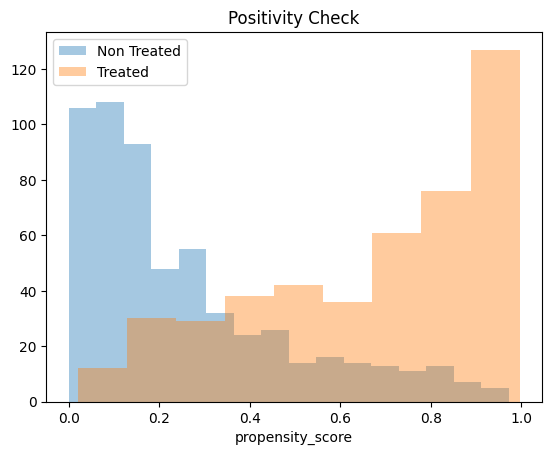

In [ ]:
sns.distplot(data_ps.query("mar1_1a==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("mar1_1a==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

In [ ]:
print(data_ps['propensity_score'].min())
print(data_ps['propensity_score'].max())

3.295181297038877e-05
0.9959721108851898


Finally, we can use our propensity score weighting estimator to estimate the average treatment effect.

Standardizing the continous outcome variable

In [ ]:
# from sklearn.preprocessing import StandardScaler

# print(data_with_categ[Y].head())
# scaler = StandardScaler()
# data_with_categ[Y] = scaler.fit_transform(data_with_categ[[T]])



In [ ]:
print(data_with_categ[Y].head())

1     3.0
2     0.0
5     2.0
7     1.0
12    0.0
Name: mntlhlth_1a, dtype: float64


In [ ]:
weight = ((data_ps["mar1_1a"]-data_ps["propensity_score"]) /
          (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

y1 = sum(data_ps.query("mar1_1a==1")["mntlhlth_1a"]*weight_t) / len(df_prep)
y0 = sum(data_ps.query("mar1_1a==0")["mntlhlth_1a"]*weight_nt) / len(df_prep)

ate = np.mean(weight * data_ps["mntlhlth_1a"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", ate)

Y1: 4.304532424018079
Y0: 3.9384499583558434
ATE 0.36608246566223845


Propensity score weighting is saying that we should expect treated individuals to be 0.37 standard deviations above their untreated fellows, in terms of mntlhlth. We can also see that if no one got the treatment, we should expect the general level of mntlhlth to be 3.93 standard deviation higher than what it is now. By the same reasoning, we should expect the general level of mntlhlth to be 4.30 standards deviation higher if we’ve given everyone the seminar. Contrast this to the 0.37 ATE estimate we’ve got by simply comparing treated and untreated.

This is evidence that the bias we have is indeed positive and that controlling for X gives us a more modest estimate of the impact of the growth mindset.

In [ ]:
from joblib import Parallel, delayed # for parallel processing

# define function that computes the IPTW estimator
def run_ps(df, X, T, y):
    # estimate the propensity score
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]

    weight = (df[T]-ps) / (ps*(1-ps)) # define the weights
    return np.mean(weight * df[y]) # compute the ATE

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(run_ps)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)


In [ ]:
print(f"ATE: {ates.mean()}")
print(f"95% C.I.: {(np.percentile(ates, 2.5), np.percentile(ates, 97.5))}")

ATE: 0.3451407856551422
95% C.I.: (-1.6278231612195917, 1.923908577860906)


<ipython-input-45-87ba00a6dd04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ates, kde=False)


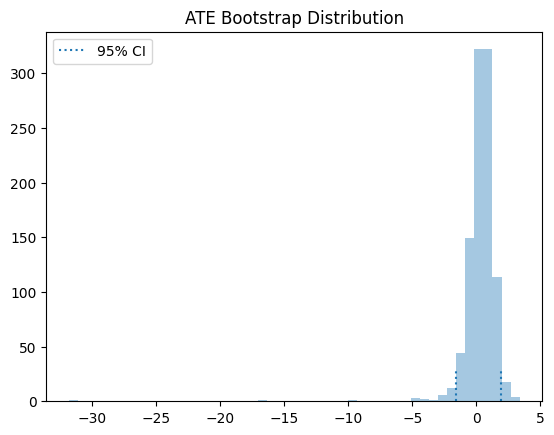

In [ ]:
import seaborn as sns
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 30, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 30, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

In fact, maximising the prediction power of the propensity score can even hurt the causal inference goal. Propensity score doesn’t need to predict the treatment very well. It just needs to include all the confounding variables. If we include variables that are very good in predicting the treatment but have no bearing on the outcome this will actually increase the variance of the propensity score estimator. This is similar to the problem linear regression faces when we include variables correlated with the treatment but not with the outcome.

In [ ]:
# from sklearn.preprocessing import StandardScaler

# print(data_with_categ[Y].head())
# scaler = StandardScaler()
# data_with_categ[Y] = scaler.fit_transform(data_with_categ[[T]])



In [ ]:
# print(data_with_categ[Y].head())


## Doubly robust estimator

Should we normalize Y, outcome variable? What if variable is binary?

In [ ]:
categ = ['adults_1a', 'attend_1a','degree_1a', 'earnrs_1a', 'hhrace_1a',
         'satfin_1a', 'wrkstat_1a', 'neisafe_1a', 'relpersn_1a']

data_with_categ = pd.concat([
    df_prep.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(df_prep[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(data_with_categ.shape)

(1036, 56)


In [ ]:
data_with_categ = data_with_categ.drop(columns=['samptype', 'yearid', 'marital_1a'])

In [ ]:
data_with_categ.head()

,mar1_1a,mntlhlth_1a,adults_1a_1.0,adults_1a_2.0,adults_1a_3.0,adults_1a_4.0,adults_1a_5.0,adults_1a_6.0,adults_1a_8.0,attend_1a_0.0,...,wrkstat_1a_7.0,wrkstat_1a_8.0,neisafe_1a_1.0,neisafe_1a_2.0,neisafe_1a_3.0,neisafe_1a_4.0,relpersn_1a_1.0,relpersn_1a_2.0,relpersn_1a_3.0,relpersn_1a_4.0
1,1.0,3.0,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,0.0,0.0,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
5,0.0,2.0,False,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,True
7,0.0,1.0,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
12,0.0,0.0,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [ ]:
def doubly_robust(df, X, T, Y):
    ps = LogisticRegression(C=1e6, max_iter=1000).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    mu0 = LinearRegression().fit(df.query(f"{T}==0")[X], df.query(f"{T}==0")[Y]).predict(df[X])
    print(max(mu0))
    print(min(mu0))
    mu1 = LinearRegression().fit(df.query(f"{T}==1")[X], df.query(f"{T}==1")[Y]).predict(df[X])
    print(max(mu1))
    print(min(mu1))
    return (
        np.mean(df[T]*(df[Y] - mu1)/ps + mu1) -
        np.mean((1-df[T])*(df[Y] - mu0)/(1-ps) + mu0)
    )

In [ ]:
from sklearn.linear_model import LinearRegression

T = 'mar1_1a'
Y = 'mntlhlth_1a'
X = data_with_categ.columns.drop([T, Y])

doubly_robust(data_with_categ, X, T, Y)

12.5
-1.5
478728008982047.0
-13.0


545924199146.56146

In [ ]:
from joblib import Parallel, delayed # for parallel processing

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(doubly_robust)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

In [ ]:
print(f"ATE 95% CI:", (np.percentile(ates, 2.5), np.percentile(ates, 97.5)))

ATE 95% CI: (-4439652356115.515, 5401550259034.349)


<ipython-input-55-0f1972910c9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ates, kde=False)


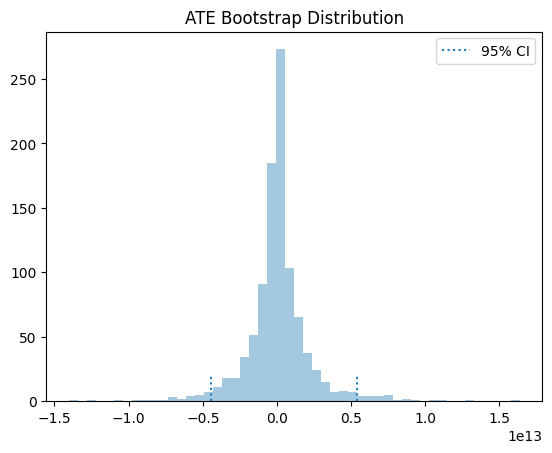

In [ ]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 20, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 20, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

## Rough Work below this cell

In [ ]:
df_prep1 = df_prep[df_prep['samptype']==2016].copy()
print(df_prep1.shape)
df_prep2 = df_prep[df_prep['samptype']==2018].copy()
print(df_prep2.shape)

In [ ]:
df_prep1.head()

In [ ]:
df_prep1.tail()

In [ ]:
df_prep2.head()

In [ ]:
df_prep1['unique_id'] = df_prep1['yearid'] - 2016*10000

In [ ]:
df_prep1[['samptype', 'yearid', 'unique_id']].head()


In [ ]:
df_prep1[['samptype', 'yearid', 'unique_id']].tail()


In [ ]:
df_prep2['unique_id'] = df_prep2['yearid'] - 2018*10000

In [ ]:
df_prep2[['samptype', 'yearid', 'unique_id']].head()


In [ ]:
df_prep2[['samptype', 'yearid', 'unique_id']].tail()


In [ ]:
df_prep_final = pd.merge(df_prep1[['samptype', 'yearid', 'adults_1a', 'attend_1a','degree_1a', 'earnrs_1a', 'hhrace_1a',
                 'satfin_1a', 'wrkstat_1a', 'neisafe_1a', 'relpersn_1a', 'mar1_1a',
                 'marital_1a', 'unique_id']],
                         df_prep2[['mntlhlth_1b', 'unique_id']], on='unique_id', how='inner')

In [ ]:
df_prep_final.shape

In [ ]:
df_prep_final.head()

In [ ]:
df_prep_final.dropna(inplace=True)
df_prep_final.shape

In [ ]:
df_prep_final.head()

In [ ]:
df_prep_final.tail()

In [ ]:
df_prep.size

In [ ]:
df_prep.dropna(inplace=True)

In [ ]:
df_prep.head()

In [ ]:
df_prep.size

In [ ]:
print(df['mar1_1a'].unique())
print(df['marital_1a'].unique())

In [ ]:
# Categories:
# {married} Married
# {widowed} Widowed
# {divorced} Divorced
# {separated} Separated
# {never_married} Never married
# {dontknow} DON'T KNOW
# {refused} REFUSED

In [ ]:
# MARITAL: Categorical (Single)
# Are you currently--married, widowed, divorced, separated, or have you never been married?
# Categories:
# {married} Married
# {widowed} Widowed
# {divorced} Divorced
# {separated} Separated
# {never_married} Never married

In [ ]:
print(df['mntlhlth_1a'].unique())

In [ ]:
print(len(df['mntlhlth_1a'].unique()))

In [ ]:
df_index = pd.read_excel('GSS_Codebook_index.xlsx')

# # Display the DataFrame
# print(df)

In [ ]:
# !pip install openpyxl

In [ ]:
df_index.head()

In [ ]:
print(df_index.columns.tolist())

In [ ]:
select_list = [ 'phase_1a', 'phone_1a',
'polviews_1a',
'pray_1a',
'prestg10_1a',
'Prestg105plus_1a',
 'Preteen_1a',
 'Race_1a',
'racecen1_1a',
'raclive_1a',
'rank_1a',
'ratetone_1a',
'Reborn_1a',
 'reg16_1a',
'region_1a',
'relactiv_1a',
'relate1_1a',
'relhh1_1a',
'relhhd1_1a',
'relig_1a',
'relig16_1a',
'Reliten_1a',
 'relpersn_1a',
'Res16_1a',
 'respnum_1a',
'Rplace_1a',
 'rvisitor_1a',
'sampcode_1a',
'sample_1a',
'satfin_1a',
'savesoul_1a',
'sei10_1a', 'sei10educ_1a',
'Sei10inc_1a',
 'sex_1a',
'sibs_1a',
'size_1a',
'spaneng_1a',
'sprtprsn_1a',
'srcbelt_1a',
'teens_1a',
'version_1a',
'Vetyears_1a',
 'visitors_1a',
'vote12_1a',
'weekswrk_1a',
'whoelse1_1a',
'Whoelse2_1a',
 'whoelse3_1a',
'whoelse4_1a',
'Whoelse5_1a',
 'Whoelse6_1a'
, 'wrkgovt_1a',
 'wrkslf_1a', 'wrkstat_1a',
'wtss_1a',
'Xnorcsiz_1a',
'zodiac_1a',
'huadd_1a',
'dwellpre_1a',
'kidsinhh_1a',
'respond_1a',
'incuspop_1a',
'neisafe_1a',
'rlooks_1a',
'Rgroomed_1a',
'rweight_1a']

In [ ]:
print(select_list)

In [ ]:
for i in select_list:
    i1 = i.split('_')
#     print(i1[0].upper())
    xx1 = df_index[df_index['Unnamed: 0']==i1[0].upper()]
    print('\''+i+'\'', ":", xx1.iloc[0,1])

In [ ]:
['adults_1a', 'attend_1a', 'degree_1a', 'earnrs_1a', 'hhrace_1a', 'satfin_1a', 'wrkstat_1a', 'neisafe_1a']

In [ ]:
col_set = set(df.columns)

In [ ]:
giv_set = set(['adults_1a', 'attend_1a', 'degree_1a', 'earnrs_1a', 'hhrace_1a', 'satfin_1a', 'wrkstat_1a', 'neisafe_1a'])

In [ ]:
if giv_set.issubset(col_set):
     print( True)
else:
    print( False)

In [ ]:
df2 = df[['adults_1a', 'attend_1a', 'degree_1a', 'earnrs_1a', 'hhrace_1a', 'satfin_1a', 'wrkstat_1a', 'neisafe_1a']].copy(deep=True)

In [ ]:
df2.head()

In [ ]:
# Calculate percentage of NaN values in each column
nan_percentage = df2.isnull().mean() * 100


In [ ]:
print(nan_percentage)

In [ ]:
df2.shape

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.shape

In [ ]:
Try without one hot encoding
Check correlation matrix, 2 predictorsm
Multicolinearity issue
vif to remove multicoll.
5 or 10 threshold of vif below which remove